<Axes: title={'center': 'Price'}, xlabel='Days'>

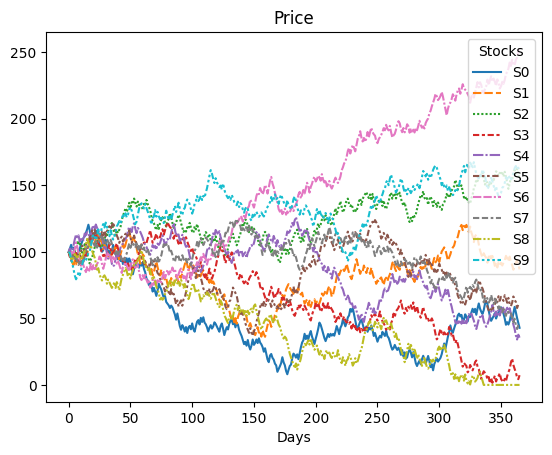

In [22]:
from garpar.datasets import make_risso_uniform
from garpar.core.plot_acc import PortfolioPlotter
import pandas as pd
import numpy as np

pf = make_risso_uniform(random_state=42)

plotter = PortfolioPlotter(pf)

plotter.line()

In [25]:
df = pf.as_prices()
df.head(5)

SyntaxError: invalid syntax (14757903.py, line 1)

In [ ]:
np.log2

In [84]:
last = None
result = []
for idx, row in df.iterrows():
    if last is None:
        last = row
        continue

    diff = row - last
    loss = diff < 0
    result.append(loss)
    last = row

mm = eps + pd.DataFrame(result).mean()
coso = (mm * np.log2(mm)) + ((1 - mm) * np.log2(1 - mm))

c = -1 / np.log2(2)

total_df = (coso * c).to_frame().T
total_df.index = ["Total"]
total_df

Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Total,0.989612,0.997894,0.785628,0.985178,0.988648,0.995603,0.788263,0.995427,0.998241,0.973487,...,0.751748,0.999642,0.940652,0.924216,0.885351,0.881129,0.782973,0.99497,0.982488,0.908139


In [107]:
import pypfopt

w_size = 1800

returns = pypfopt.expected_returns.returns_from_prices(prices=df)
rolling = returns.rolling(w_size, min_periods=w_size)

In [108]:
eps = 1e-4
eps

0.0001

In [109]:
def agg(s):
    mm = eps + (np.sum(s < 0) / w_size)
    coso = (mm * np.log2(mm)) + ((1 - mm) * np.log2(1 - mm))

    c = -1 / np.log2(2)

    return coso * c


res = rolling.agg(agg)

In [110]:
full = pd.concat([total_df, res.mean().to_frame().T])
full.index = ["TOT", "WIN"]
full

Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
TOT,0.989612,0.997894,0.785628,0.985178,0.988648,0.995603,0.788263,0.995427,0.998241,0.973487,...,0.751748,0.999642,0.940652,0.924216,0.885351,0.881129,0.782973,0.994970,0.982488,0.908139
WIN,0.990486,0.997448,NaN,0.986718,0.993901,0.995647,NaN,0.995320,0.997161,0.979236,...,NaN,0.999885,0.935560,0.939457,0.882761,0.908906,0.784200,0.995939,0.988087,0.919816


In [98]:
len(df)

2583

In [113]:
mk_pf = MultiSector(
    {"foo": RissoLevyStable(), "zaz": RissoNormal()},
)

In [121]:
pf = mk_pf.make_portfolio(stocks=3, price=[25, 27, 100])
pf

Stocks,"foo_S0[W 1.0, H 0.5]","foo_S1[W 1.0, H 0.5]","zaz_S0[W 1.0, H 0.5]"
Days,,,
0,25.000000,27.000000,100.000000
1,25.002301,27.010590,99.905064
2,24.998830,27.015983,99.799582
3,25.004625,27.014306,100.214238
4,25.005294,27.011890,99.898029
...,...,...,...
361,24.739957,27.282303,95.998911
362,24.743169,27.288368,95.987564
363,24.734572,27.291266,95.871586


In [126]:
pf.copy(weights=[1, 2, 3])

ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer